In [1]:
import tensorflow as tf

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets("/tmp/data",one_hot = True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [6]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [8]:
mnist.train.images.shape

(55000, 784)

In [11]:
sample = mnist.train.images[2].reshape(28,28)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

/home/vishal/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


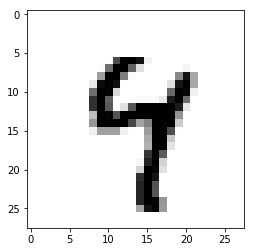

In [14]:
plt.imshow(sample, cmap="Greys")

In [15]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [16]:
n_classes = 10
n_samples = mnist.train.num_examples

In [17]:
n_input = 784

In [18]:
n_hidden_1 = 256
n_hidden_2 = 256

In [27]:
def multilayer_perceptron(x,weights,biases):
    '''
    x: Placeholder for data input
    weights: dicts of weights
    biases: dict of bias values 
    '''
    
    #firts hidden layer with RELU Activation
    # x*w + b
    
    layer_1= tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    
    #RELU(x*w + b)  -> f(x) = max(0,x)
    layer_1 = tf.nn.relu(layer_1)
    
    # second hidden layer
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    #Last output layer
    
    out_layer = tf.matmul(layer_2,weights['out']) + biases ['out']
    
    return out_layer

In [28]:
weights = {
    
    'h1' : tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2' : tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

In [29]:
weights

{'h1': <tensorflow.python.ops.variables.Variable at 0x7f09d50b9cc0>,
 'h2': <tensorflow.python.ops.variables.Variable at 0x7f09d51e50b8>,
 'out': <tensorflow.python.ops.variables.Variable at 0x7f09d51e57b8>}

In [30]:
biases = {
    
    'b1' : tf.Variable(tf.random_normal([ n_hidden_1])),
    'b2' : tf.Variable(tf.random_normal([ n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [31]:
x = tf.placeholder('float',[None,n_input])

In [32]:
y = tf.placeholder('float',[None,n_classes])

In [33]:
pred = multilayer_perceptron(x,weights,biases)

In [38]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=pred))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Training the Model

In [39]:
t = mnist.train.next_batch(1)

In [40]:
Xsamp, ysamp = t

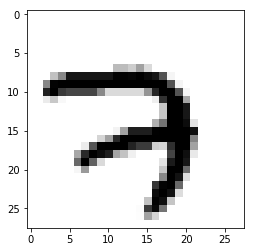

In [44]:
plt.imshow(Xsamp.reshape(28,28), cmap ='Greys')

In [45]:
ysamp

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.]])

## Session

In [47]:
sess = tf.InteractiveSession()

In [48]:
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [49]:
sess.run(init)

In [50]:
# 15 loops

for epoch in range(training_epochs):
    
    #cost
    avg_cost = 0.0
    
    total_batch = int(n_samples/batch_size)
    
    for i in range(total_batch):
        
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        _,c = sess.run([optimizer,cost],feed_dict={x:batch_x, y:batch_y})
        
        avg_cost += c/total_batch
        
    print("Epoch : {} cost{:.4f}".format(epoch+1,avg_cost))
    
print("Model has completed {} Epochs of training".format(training_epochs))

Epoch : 1 cost197.6385
Epoch : 2 cost46.0649
Epoch : 3 cost29.6456
Epoch : 4 cost20.6501
Epoch : 5 cost15.1942
Epoch : 6 cost11.3858
Epoch : 7 cost8.5083
Epoch : 8 cost6.3217
Epoch : 9 cost4.7146
Epoch : 10 cost3.7805
Epoch : 11 cost2.7476
Epoch : 12 cost2.0614
Epoch : 13 cost1.6310
Epoch : 14 cost1.3743
Epoch : 15 cost0.9123
Model has completed 15 Epochs of training


## Model Evaluation

In [51]:
correct_predictions = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

In [52]:
print(correct_predictions[0])

Tensor("strided_slice:0", shape=(), dtype=bool)


In [53]:
correct_predictions = tf.cast(correct_predictions,'float')

In [54]:
print(correct_predictions[0])

Tensor("strided_slice_1:0", shape=(), dtype=float32)


In [55]:
accuracy = tf.reduce_mean(correct_predictions)

In [56]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [57]:
mnist.test.labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [58]:
accuracy.eval({x:mnist.test.images, y:mnist.test.labels})

0.94260001